In [34]:
import pandas as pd

In [35]:
doc={"review":["Good Product","Bad Product","Execellent","Normal","Intemidiate","Not expected","Low Quality","Good Quality"],
     "sentiment":[1,0,1,0,1,0,0,1]}

df=pd.DataFrame(doc)
print(df)

#making dataset by own

         review  sentiment
0  Good Product          1
1   Bad Product          0
2    Execellent          1
3        Normal          0
4   Intemidiate          1
5  Not expected          0
6   Low Quality          0
7  Good Quality          1


In [36]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(oov_token="<nothing>")
tokenizer.fit_on_texts(df["review"])

* **Work of Tokenizer**
1. covert all uppercase latter to lowercase latter
2. assign unique interger number to each unique word
3. if unknown word(word which is not in dataset) found then replace it with nothing word

In [37]:
tokenizer.word_index

{'<nothing>': 1,
 'good': 2,
 'product': 3,
 'quality': 4,
 'bad': 5,
 'execellent': 6,
 'normal': 7,
 'intemidiate': 8,
 'not': 9,
 'expected': 10,
 'low': 11}

* you can see that we have 10 + 1(nothing) unique words and Tokenizer assign them unique number.
* remember, if 2 times good is reapeating then also only one unique integer is assign to good.
* one good have one assigned interger and second one have other is not possible.

In [38]:
tokenizer.word_counts

OrderedDict([('good', 2),
             ('product', 2),
             ('bad', 1),
             ('execellent', 1),
             ('normal', 1),
             ('intemidiate', 1),
             ('not', 1),
             ('expected', 1),
             ('low', 1),
             ('quality', 2)])

* also, we can fatch How many time a word is repeated??

In [39]:
encoded_sequence=tokenizer.texts_to_sequences(df["review"])
encoded_sequence

# text_to_sequences is the function which assign interger to word

[[2, 3], [5, 3], [6], [7], [8], [9, 10], [11, 4], [2, 4]]

* as we know variable shape of input is not valid in any Neural Network, so we have to reshape it by adding 0 value in prefix or in postfix and make them unishape.
* This functionality is achived by pad_sequences function provided by keras library avilable in utils class.
* you can see [2,3] have (1,2) shape where as [6] have (1,1) shape.
* pad_sequences make their shape to [1,2] as maximum array/text length is 2

In [40]:
from keras.utils import pad_sequences
padded_encoded_sequence=pad_sequences(encoded_sequence,padding="post")
padded_encoded_sequence

#unishaping

array([[ 2,  3],
       [ 5,  3],
       [ 6,  0],
       [ 7,  0],
       [ 8,  0],
       [ 9, 10],
       [11,  4],
       [ 2,  4]], dtype=int32)

In [41]:
padded_encoded_sequence.shape

#shape after reshaping
#as I said pad_sequences make their shape to [1,2] as maximum array/text length is 2
#[8,2] because we have 8 rows/8 reviews

(8, 2)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded_encoded_sequence,df["sentiment"],test_size=0.2)

#splitting training and testing data

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6, 2)
(6,)
(2, 2)
(2,)


In [44]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

#importing Sequential model,SimpleRNN layer and Dense layer from keras

In [45]:
model=Sequential()

model.add(SimpleRNN(64,return_sequences=False,input_shape=(2,1)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

#RNN architecture
#64 is the no of nodes
#retrun_sequences=False means intermediate output is not required
#input shape=shape of one review

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




* **Trainable Perameters**
**at layer 0 at (SimpleRNN layer)**
* (2*64)(previous/no of input)*currunt node + (64*64)(feedback)
* =128 + 4096
* =4224

**at layer 1 at(Dense layer)**
* = 64(previous node) * 1(currunt node) + 1(bias)
* = 65





In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#model compile

In [47]:
history=model.fit(x_train,y_train,epochs=100)

#model training

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.8006 - accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7295 - accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6753 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6377 - accuracy: 0.8333
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6143 - accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6016 - accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5953 - accuracy: 0.6667
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5920 - accuracy: 0.6667
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5895 - accuracy: 0.6667
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5864 - accuracy: 0.6667
Epoch 11/100
1/1 [===

In [48]:
y_predict=model.predict(x_test)
y_predict

#model testing

1/1 [==============================] - 0s 176ms/step


array([[0.5066152],
       [0.6164243]], dtype=float32)

In [49]:
print(x_test)
print()
print(y_test)

#our prediction and original output is maching
#0.72 ~ 1
#0.096 ~ 0

[[6 0]
 [2 4]]

2    1
7    1
Name: sentiment, dtype: int64


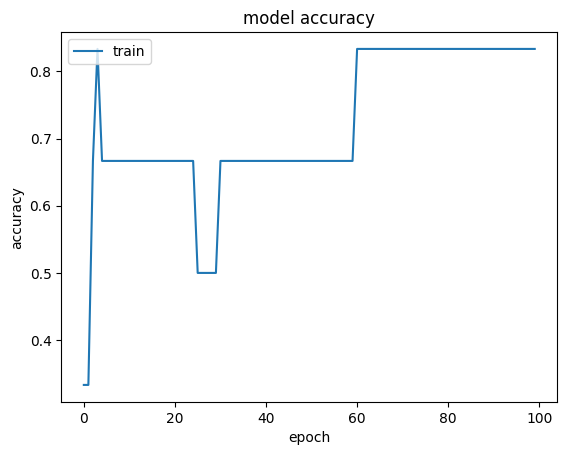

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#ploting epochs v/s tranining accuracy graph

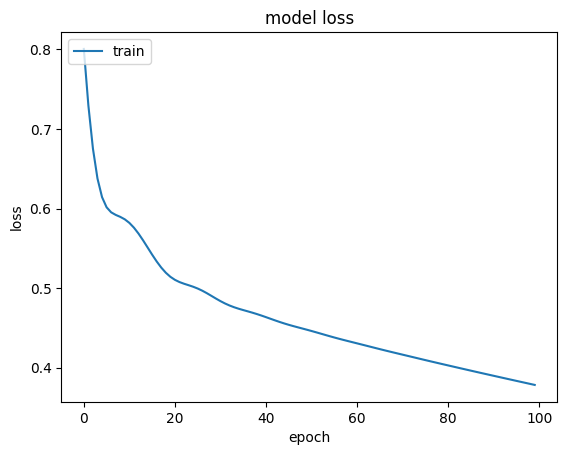

In [51]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#ploting epochs v/s training loss